In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from collections import Counter
import random

[0.7387387387387387, 0.7378378378378379, 0.7882882882882883, 0.79009009009009, 0.7900900900900901, 0.7792792792792793, 0.799099099099099, 0.7945945945945946, 0.8045045045045045, 0.8018018018018017, 0.809009009009009, 0.8009009009009009, 0.8018018018018017, 0.7945945945945946, 0.8054054054054054, 0.8018018018018018, 0.799099099099099, 0.7954954954954955, 0.8117117117117116, 0.8081081081081081, 0.8018018018018017, 0.8063063063063064, 0.8153153153153154, 0.8099099099099097, 0.80990990990991, 0.8081081081081081, 0.80990990990991, 0.8036036036036036, 0.8072072072072073, 0.8063063063063064]


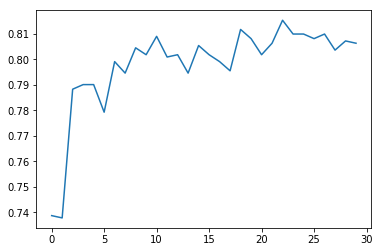

In [2]:
def retrieve_train_data(i):
    dataset_lst = [1,2,3,4,5,6,7,8,9,10]
    dataset_lst.remove(i)
    train_data = []
    train_label = []
    for dataset in dataset_lst:
        with open('knn/data'+str(dataset)+'.csv', 'r') as data_file:
            data = list(csv.reader(data_file))
            for i in range(len(data)):
                data[i] = [int(j) for j in data[i]] 
            train_data += [np.array(x) for x in data]
        with open('knn/labels'+str(dataset)+'.csv','r') as label_file:
            label = list(csv.reader(label_file))
            train_label += [y[0] for y in label]
    return train_data,train_label

def retrieve_test_data(index):
    with open('knn/data'+str(index)+'.csv', 'r') as data_file:
        test_data = list(csv.reader(data_file))
        for i in range(len(test_data)):
            test_data[i] = [int(j) for j in test_data[i]]
        test_data = [np.array(x) for x in test_data]
    with open('knn/labels'+str(index)+'.csv','r') as label_file:
        test_label = list(csv.reader(label_file))
        test_label = [y[0] for y in test_label]
    return test_data,test_label

def knn_test(train_data,train_label, test_data, test_label,sorted_eu_index_lst,k):
    correct_count = 0
    for i in range(len(test_data)):
        td = test_data[i]
        knn = [train_label[i] for i in sorted_eu_index_lst[i][:k]] 
        
        count_label = Counter(knn).most_common(2)
        total_num = len(knn)
        if count_label[0][1]/total_num <= 0.5:
            mode = random.choice([count_label[0][0],count_label[1][0]])
        else:
            mode = count_label[0][0]
        
        if test_label[i] == mode:
            correct_count += 1
    return correct_count/len(test_data)

def data_preprocess(num_of_splits):
    train_dataset = []
    train_labelset = []
    test_dataset = []
    test_labelset = []
    eucli_prepro_lst = []
    for i in range(1, num_of_splits+1):
        #load data
        test_data,test_label = retrieve_test_data(i)
        train_data, train_label = retrieve_train_data(i)
        train_dataset.append(train_data)
        train_labelset.append(train_label)
        test_dataset.append(test_data)
        test_labelset.append(test_label)
        sorted_eu_index_lst = []
        for i in range(len(test_data)):
            td = test_data[i]
            euclidean_lst = []
            for d in train_data:
                euclidean_lst.append(np.linalg.norm(td - d))
            sorted_eu_index_lst.append(sorted(range(len(euclidean_lst)), key=lambda i: euclidean_lst[i]))
        eucli_prepro_lst.append(sorted_eu_index_lst)
    return train_dataset,train_labelset,test_dataset,test_labelset,eucli_prepro_lst

def cross_validation(max_k, num_of_splits):
    train_dataset,train_labelset,test_dataset,test_labelset,eucli_prepro_lst=data_preprocess(num_of_splits)
    ave_acc_lst = []
    for k in range(1, max_k+1):
        acc = []
        for i in range(num_of_splits):        
            #test
            accuracy = knn_test(train_dataset[i],train_labelset[i], test_dataset[i], test_labelset[i],eucli_prepro_lst[i],k)
            acc.append(accuracy)
        ave_acc_lst.append(np.mean(acc))
    print(ave_acc_lst)
    plt.plot(range(max_k),ave_acc_lst)
    plt.show()
    
if __name__=='__main__': 
    max_k=30
    num_of_splits=10
    cross_validation(max_k, num_of_splits)